In [ ]:
%pip install pandas matplotlib
%pip install tensorflow keras scikit-learn

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Size of the train set: (37500, 3072)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

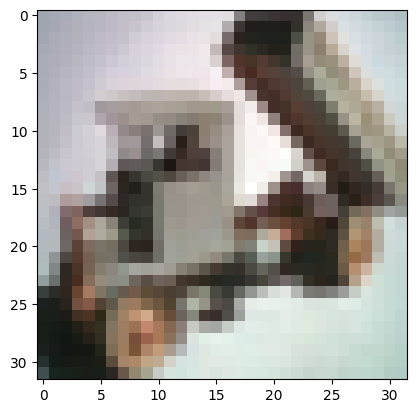

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

print('Size of the train set:', X_train.shape)

plt.imshow(X_val[0].reshape(32, 32, 3))
Y_val[0]

## Original Model

In [ ]:
from keras import activations
from keras.utils import set_random_seed
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((32*32*3,)))
# Removed layer
# model.add(Dense(4096, activation=activations.relu))
model.add(Dense(2048, activation=activations.relu))
model.add(Dropout(0.2))
model.add(Dense(1024, activation=activations.relu))
model.add(Dropout(0.1))
model.add(Dense(512, activation=activations.relu))
model.add(Dense(256, activation=activations.relu))
model.add(Dense(10, activation=activations.softmax))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,050,378 (34.52 MB)

 Trainable params: 9,050,378 (34.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.1862 - loss: 2.3364 - val_accuracy: 0.3293 - val_loss: 1.8455
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3310 - loss: 1.8519 - val_accuracy: 0.3609 - val_loss: 1.7500
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3627 - loss: 1.7599 - val_accuracy: 0.3701 - val_loss: 1.7198
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3712 - loss: 1.7339 - val_accuracy: 0.3848 - val_loss: 1.6992
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3955 - loss: 1.6808 - val_accuracy: 0.4093 - val_loss: 1.6456
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4035 - loss: 1.6570 - val_accuracy: 0.4128 - val_loss: 1.6188
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4142 - loss: 1.6350 - val_accuracy: 0.4255 - val_loss: 1.5789
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4178 - loss: 1.6080 - val_accuracy: 0

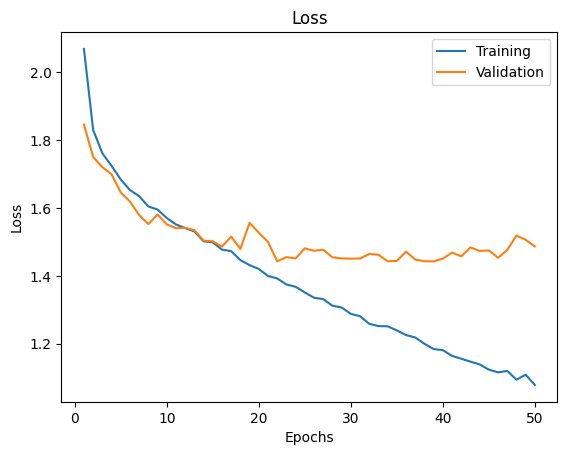

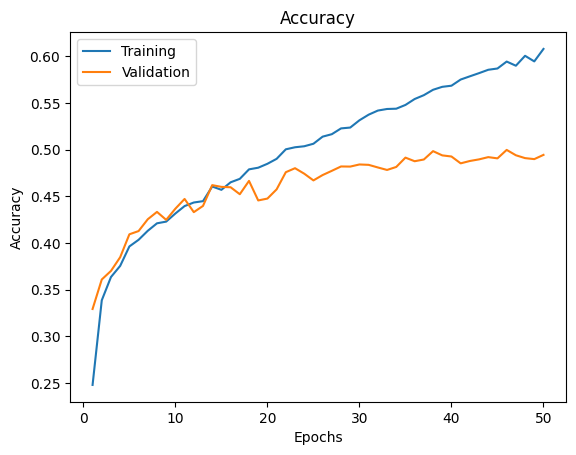

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(history)
plot_accuracy(history)